## Imports and functions

In [1]:
%matplotlib inline
import matplotlib.pyplot as pyplot
import utils 
import Pass
import numpy as np
import glob
from Scratch import Scratch
from scipy.interpolate import interp1d

FS = (12,6)

## Read and display data for series 200 (GRIND)

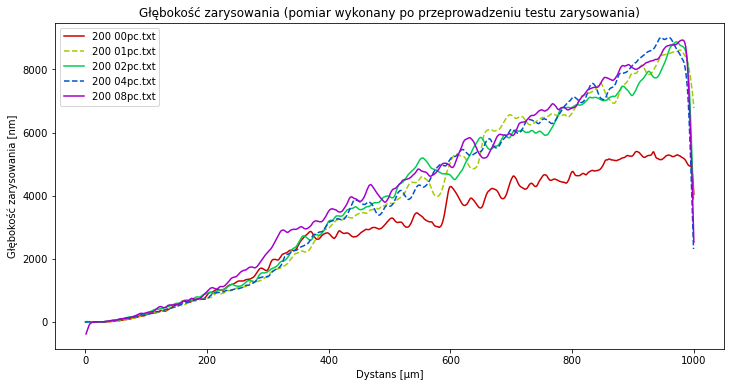

In [2]:
fileList = sorted(glob.glob('data/scratch/wyniki/szlifowane/200*.txt'))
sampleList = [utils.read_data(file) for file in fileList]
utils.preprocess_samples(sampleList)

fig = pyplot.figure(figsize=FS)
ax = fig.add_subplot(111)
utils.plot_scratch_samples(ax, sampleList, fileList)  


## Read and display data for sieries R7200 (GRIND)

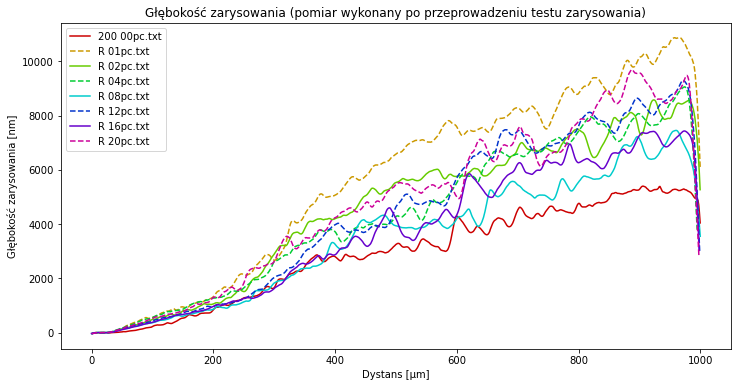

In [3]:
fileList = glob.glob('data/scratch/wyniki/szlifowane/200 00pc.txt')+sorted(glob.glob('data/scratch/wyniki/szlifowane/R*.txt'))
sampleList = [utils.read_data(file) for file in fileList]
utils.preprocess_samples(sampleList)

fig = pyplot.figure(figsize=FS)
ax = fig.add_subplot(111)

utils.plot_scratch_samples(ax, sampleList, fileList)  

# 2. SURFACE

## Read data (SURFACE)

In [4]:
fileList = sorted(glob.glob('data/scratch/wyniki/powierzchnia/200*.txt'))
sampleList = [utils.read_data(file) for file in fileList]
sampleNames = ['Ref', 'A 1%', 'A 2%', 'A 4%', 'A 8%']
utils.preprocess_samples(sampleList)

fileListR = glob.glob('data/scratch/wyniki/powierzchnia/200_00pc.txt') \
    +sorted(glob.glob('data/scratch/wyniki/powierzchnia/R7200*.txt')) \
#   +sorted(glob.glob('data/scratch/wyniki/powierzchnia/200*.txt'))
del fileListR[1] # Remove reference from hydrophobic run
sampleListR = [utils.read_data(file) for file in fileListR]
sampleNamesR = ['Ref', 'R 1%', 'R 2%', 'R 4%', 'R 8%', 'R 12%', 'R 16%', 'R 20%']
to_remove_r = [
    [0],
    [0, 5],
    [0, 5],
    [0, 2, 5],
    [0, 8],
    [0, 2],
    [0, 4],
    [0, 6]
]
for samp_no, samp_rem in enumerate(to_remove_r):
    samp_rem.reverse()
    for scratch_no in samp_rem:
        del sampleListR[samp_no][scratch_no]
utils.preprocess_samples(sampleListR)

# fig = pyplot.figure(figsize=(20,10))
# ax = fig.add_subplot(111)

# utils.plot_scratch_samples(ax, sampleList, fileList, truncate=-1) 
# #ax.set_yscale('log')
# #ax.set_xscale('log')

## Read and display mean data for sieries R7200 (SURFACE)

(0.0, 500.0)

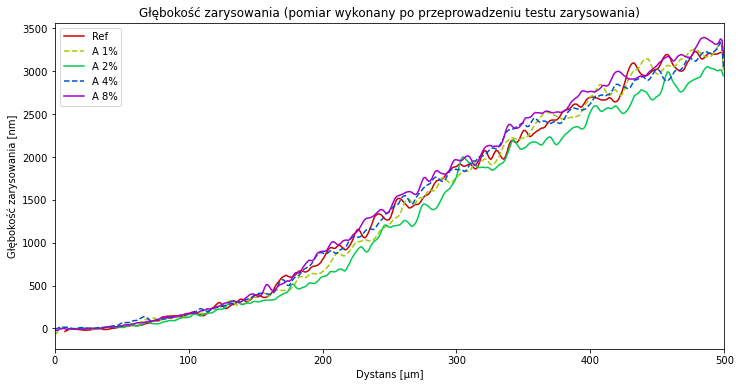

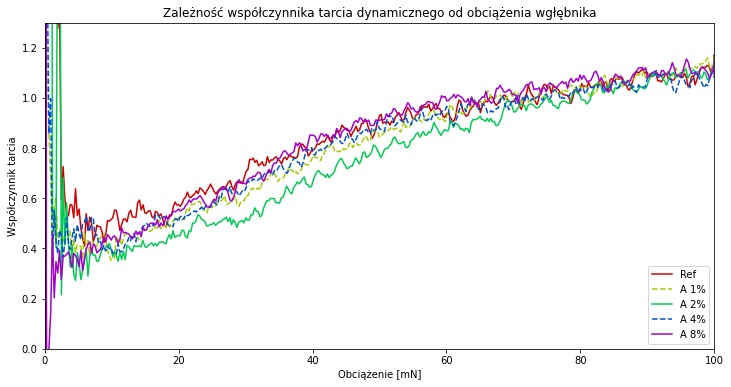

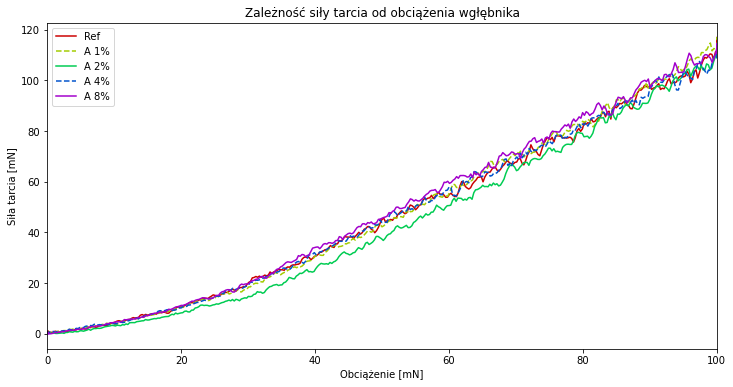

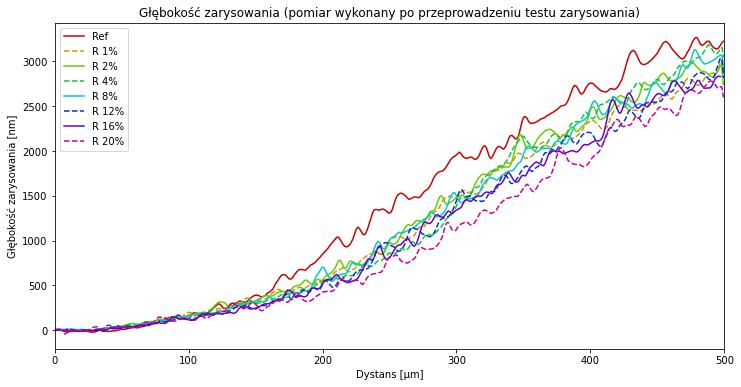

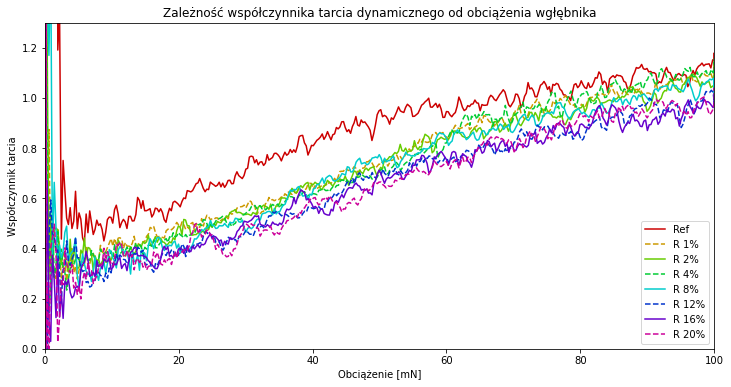

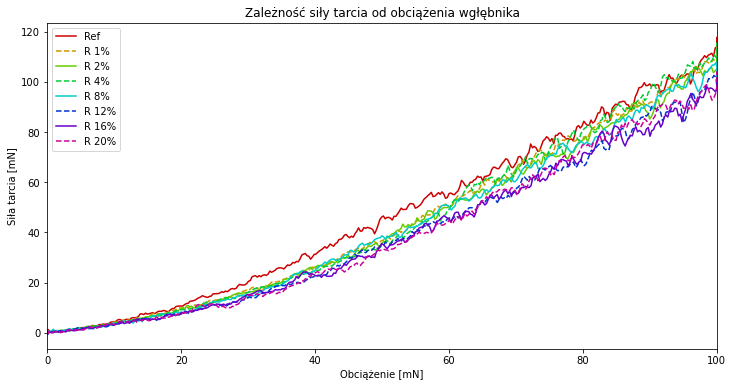

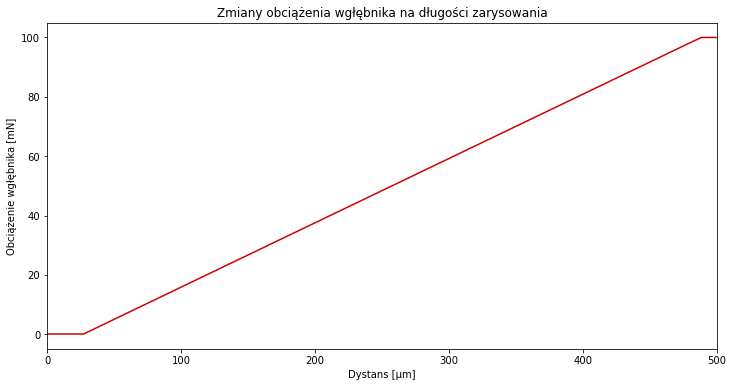

In [5]:
for sl, sn in ((sampleList, sampleNames), (sampleListR, sampleNamesR)):
    fig = pyplot.figure(figsize=FS)
    ax = fig.add_subplot(111)
    utils.plot_scratch_samples(ax, sl, sn, toPlot='d') 
    ax.set_xlim((0, 500))

    fig = pyplot.figure(figsize=FS)
    ax = fig.add_subplot(111)
    utils.plot_scratch_samples(ax, sl, sn, toPlot='fc', base='load', legend='lower right')
    ax.set_ylim([0, 1.3])
    ax.set_xlim((0, 100))

    fig = pyplot.figure(figsize=FS)
    ax = fig.add_subplot(111)
    utils.plot_scratch_samples(ax, sl, sn, toPlot='f', base='load')
    ax.set_xlim((0, 100))

fig = pyplot.figure(figsize=FS)
ax = fig.add_subplot(111)
utils.plot_scratch_samples(ax, [sampleListR[1]], sampleNamesR, toPlot='l', legend=None)
ax.set_xlim([0, 500])

    # fig = pyplot.figure(figsize=FS)
    # ax = fig.add_subplot(111)
    # utils.plot_scratch_samples(ax, sampleListR, sampleNamesR, toPlot='tf')

    # fig = pyplot.figure(figsize=FS)
    # ax = fig.add_subplot(111)
    # utils.plot_scratch_samples(ax, sampleListR, sampleNamesR, toPlot='ae') 

## Penetration rate estimatio

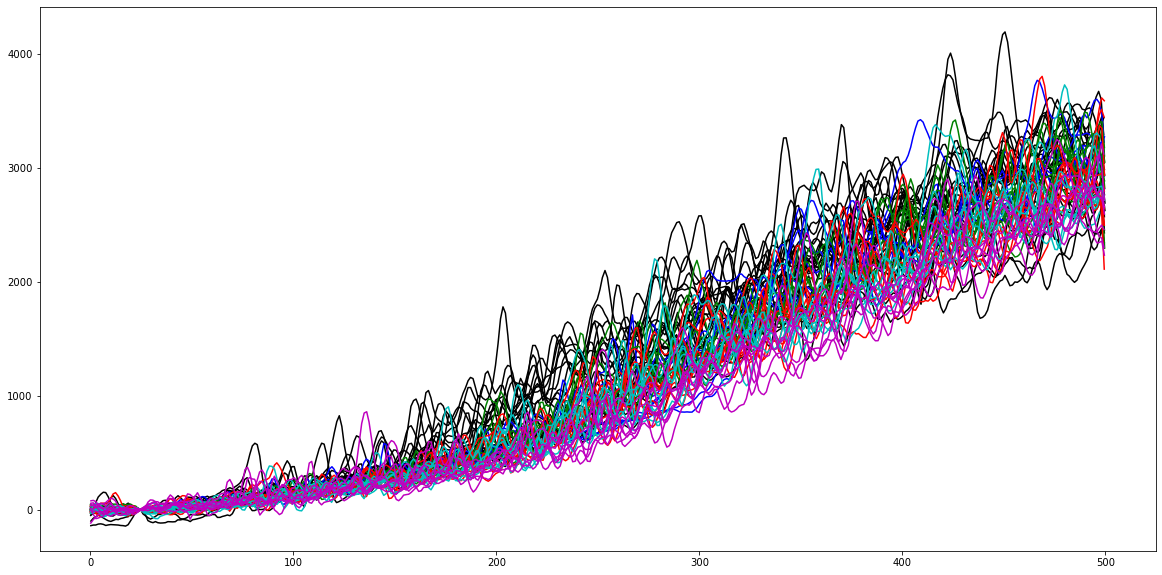

In [6]:
fig = pyplot.figure(figsize=(20,10))
ax = fig.add_subplot(111)

colors = ['k', 'k', 'k', 'b', 'g', 'r', 'c', 'm', 'y']
len(sampleList)

for idx, sample in enumerate(sampleListR):
    for scratch in sample:
        ax.plot(scratch.topo2.distance, scratch.topo2.depth, color=colors[idx])
        

# Pojedyńcze

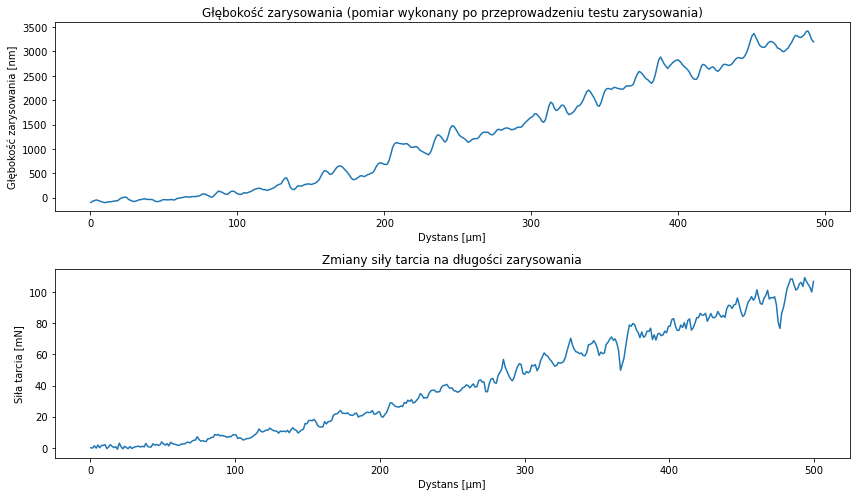

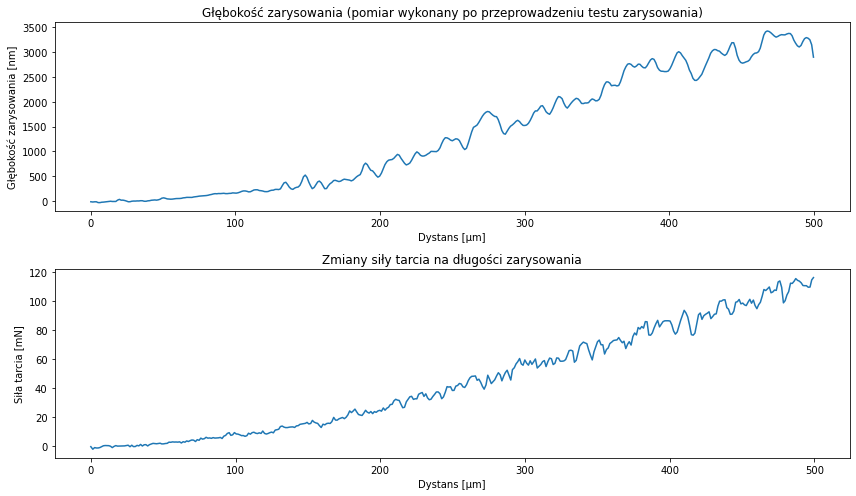

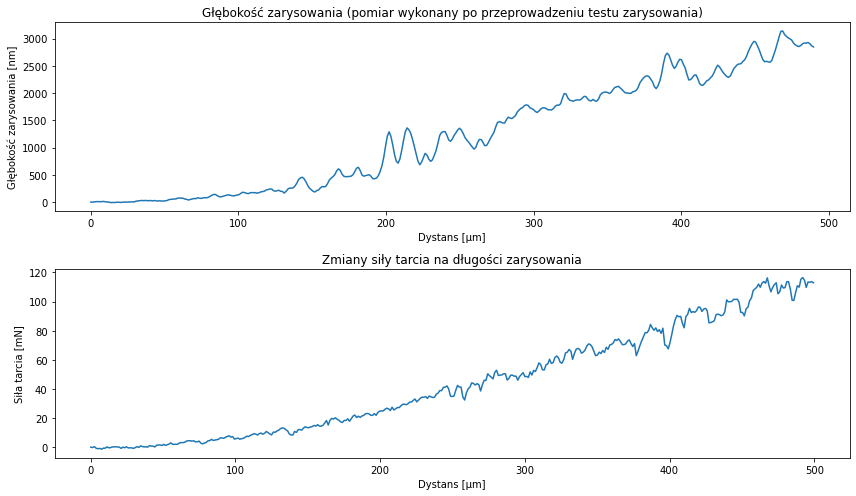

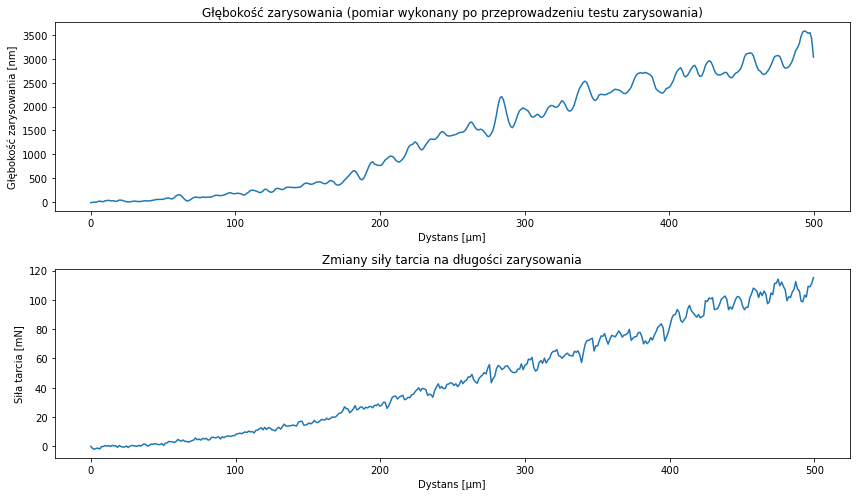

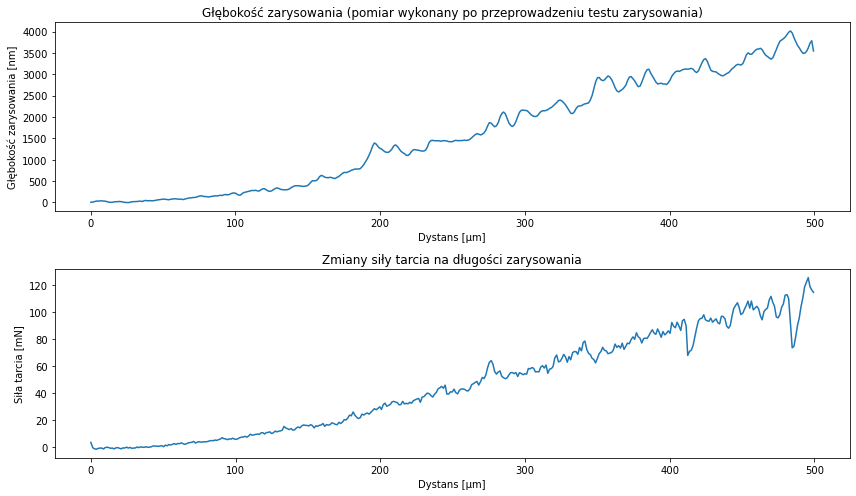

In [17]:
for idx, sample in enumerate(sampleList):
    fig = pyplot.figure(figsize=(12,7))
    ax = fig.add_subplot(211)
    utils.plot_scratch_sample(ax, [sample[1]], sampleNamesR[idx], toPlot='d')
    ax = fig.add_subplot(212)
    utils.plot_scratch_sample(ax, [sample[0]], sampleNamesR[idx], toPlot='f')
    pyplot.tight_layout()
    